In [91]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [102]:
df = pd.read_csv("TSLA_weekly_return_detailed.csv")
df1 = pd.read_csv("TSLA_weekly_return_volatility.csv")
df1

,Year,Week_Number,mean_return,volatility
0,2017,1,1.37500,2.212512
1,2017,2,0.76260,1.664688
2,2017,3,0.73250,1.337706
3,2017,4,0.66940,1.278912
4,2017,5,-0.12520,0.871693
...,...,...,...,...
258,2021,48,-1.18880,4.481174
259,2021,49,0.10140,3.866901
260,2021,50,-1.67760,3.175932
261,2021,51,3.51150,4.853970


In [232]:
df1['label']=""
for i in df1.index:
    if df1['mean_return'][i] > 0 and df1['volatility'][i] > 1.5:
        df1['label'][i+1]="red"
    else:
        df1['label'][i+1]="green"
df1

,Year,Week_Number,mean_return,volatility,label
0,2017,1,1.37500,2.212512,
1,2017,2,0.76260,1.664688,red
2,2017,3,0.73250,1.337706,red
3,2017,4,0.66940,1.278912,green
4,2017,5,-0.12520,0.871693,green
...,...,...,...,...,...
258,2021,48,-1.18880,4.481174,green
259,2021,49,0.10140,3.866901,green
260,2021,50,-1.67760,3.175932,red
261,2021,51,3.51150,4.853970,green


In [243]:
df['label'] = ""
maps = {}
for i in df1.index:
    y = df1['Year'][i]
    w = df1['Week_Number'][i]
    if y not in maps:
        maps[y] = {}
    if w not in maps[y]:
        maps[y][w] = df1['label'][i]

#df['label'] = ""
for j in df.index:
    df['label'][j] = maps[df['Year'][j]][df['Week_Number'][j]]

In [244]:
df

,Open,High,Low,Close,Adj Close,Volume,Return,Date,Week_Number,Year,Day,Weekday,mean_return,volatility,label
0,14.324000,14.688667,14.064000,14.466000,14.466000,88849500,0.000,2017-01-03,1,2017,3,Tuesday,1.37500,2.212512,
1,14.316667,15.200000,14.287333,15.132667,15.132667,168202500,4.609,2017-01-04,1,2017,4,Wednesday,1.37500,2.212512,
2,15.094667,15.165333,14.796667,15.116667,15.116667,88675500,-0.106,2017-01-05,1,2017,5,Thursday,1.37500,2.212512,
3,15.128667,15.354000,15.030000,15.267333,15.267333,82918500,0.997,2017-01-06,1,2017,6,Friday,1.37500,2.212512,
4,15.264667,15.461333,15.200000,15.418667,15.418667,59692500,0.991,2017-01-09,2,2017,9,Monday,0.76260,1.664688,red
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1253,335.600006,357.660004,332.519989,355.666656,355.666656,92713200,5.762,2021-12-23,51,2021,23,Thursday,3.51150,4.853970,green
1254,357.890015,372.333344,356.906677,364.646667,364.646667,71145900,2.525,2021-12-27,52,2021,27,Monday,0.08925,1.709398,red
1255,369.829987,373.000000,359.473328,362.823334,362.823334,60324000,-0.500,2021-12-28,52,2021,28,Tuesday,0.08925,1.709398,red
1256,366.213318,368.000000,354.713318,362.063324,362.063324,56154000,-0.209,2021-12-29,52,2021,29,Wednesday,0.08925,1.709398,red


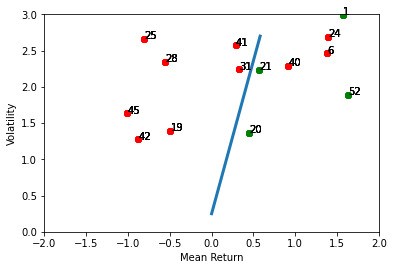

In [246]:
df2=df[df['Year']==2020]
x = df2['mean_return']
y = df2['volatility']
text = df2['Week_Number']
  

plt.xlabel("Mean Return")
plt.ylabel("Volatility")
label = df2['label']

  
for j in df2.index:
    plt.annotate(text[j], (x[j], y[j] ))
    plt.scatter(x[j],y[j],color=label[j])
  
plt.xlim((-2,2))
plt.ylim((0, 3))
plt.plot([0, 0.58], [0.25, 2.7], linewidth=3)
plt.show()


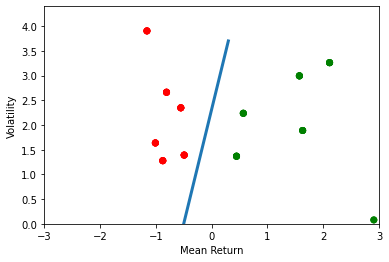

In [247]:
plt.xlabel("Mean Return")
plt.ylabel("Volatility")
label = df2['label']

lst = []
for i in df2.index:
    x = df2['mean_return'][i]
    y = df2['volatility'][i]
    b = 0
    m = 10
    if y > m*x + b and df2['label'][i] == 'green':
        lst.append(i)
    if y < m*x + b and df2['label'][i] == 'red':
        lst.append(i)
df2 = df2.drop(index=lst)

  

plt.scatter(df2['mean_return'],df2['volatility'],c=df2['label'])
  

plt.xlim((-3,3))
plt.ylim((0, 4.4))
plt.plot([-0.5, 0.3], [0, 3.7], linewidth=3)
plt.show()

In [254]:
df3 = df1[df1['Year'] ==2021]
df3['label'] = ""


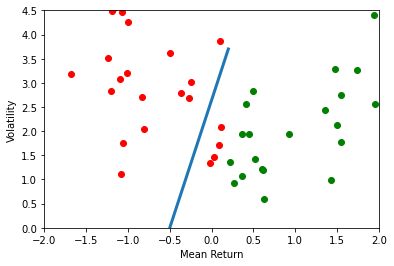

In [250]:
plt.xlabel("Mean Return")
plt.ylabel("Volatility")
df3['label']=""

lst1 = []
for i in df3.index:
    x = df3['mean_return'][i]
    y = df3['volatility'][i]
    b = 0
    m = 10.1
    if y > m*x + b:
        df3['label'][i]="red"
        
    if y < m*x + b:
        df3['label'][i]="green"
 
  

for j in df3.index:
    
    if df3['label'][j]=="green":
        plt.scatter(df3['mean_return'][j],df3['volatility'][j],c='green')
    elif df3['label'][j]=="red":
        plt.scatter(df3['mean_return'][j],df3['volatility'][j],c='red')

        
  

plt.xlim((-2,2))
plt.ylim((0, 4.5))
plt.plot([-0.5, 0.2], [0, 3.7], linewidth=3)
plt.show()

In [252]:
df5=df[df['Year']==2021]
df5['label'] = ""
dictt = {}
for i in df3.index:
    y = df3['Year'][i]
    w = df3['Week_Number'][i]
    if y not in dictt:
        dictt[y] = {}
    if w not in dictt[y]:
        dictt[y][w] = df3['label'][i]


for i in df5.index:
    df5['label'][i] = dictt[df5['Year'][i]][df5['Week_Number'][i]]

In [253]:
df5['invest']=0.0
money=100
df5['invest']= np.where(df5['Year'] == 2021,0.0,0.0)
for i in df5.index:
    if i == df5.first_valid_index():
        stock = round((money/df5['Open'][i]),2)
    df5['invest'][i] = stock*df5['Close'][i]
df5

,Open,High,Low,Close,Adj Close,Volume,Return,Date,Week_Number,Year,Day,Weekday,mean_return,volatility,label,invest
1007,239.820007,248.163330,239.063339,243.256668,243.256668,145914600,3.415,2021-01-04,1,2021,4,Monday,4.55420,3.207137,green,102.167801
1008,241.220001,246.946671,239.733337,245.036667,245.036667,96735600,0.732,2021-01-05,1,2021,5,Tuesday,4.55420,3.207137,green,102.915400
1009,252.830002,258.000000,249.699997,251.993332,251.993332,134100000,2.839,2021-01-06,1,2021,6,Wednesday,4.55420,3.207137,green,105.837199
1010,259.209991,272.329987,258.399994,272.013336,272.013336,154496700,7.945,2021-01-07,1,2021,7,Thursday,4.55420,3.207137,green,114.245601
1011,285.333344,294.829987,279.463318,293.339996,293.339996,225166500,7.840,2021-01-08,1,2021,8,Friday,4.55420,3.207137,green,123.202798
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1253,335.600006,357.660004,332.519989,355.666656,355.666656,92713200,5.762,2021-12-23,51,2021,23,Thursday,3.51150,4.853970,green,149.379996
1254,357.890015,372.333344,356.906677,364.646667,364.646667,71145900,2.525,2021-12-27,52,2021,27,Monday,0.08925,1.709398,red,153.151600
1255,369.829987,373.000000,359.473328,362.823334,362.823334,60324000,-0.500,2021-12-28,52,2021,28,Tuesday,0.08925,1.709398,red,152.385800
1256,366.213318,368.000000,354.713318,362.063324,362.063324,56154000,-0.209,2021-12-29,52,2021,29,Wednesday,0.08925,1.709398,red,152.066596
